In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
gradients = np.array([10,40,70,100,130,160])
densities = np.arange(20,200,10)

# Resultados con pchange=0.1, y psurr = 0.0

In [102]:
pchange = 0.0
psurr = 0

In [103]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [104]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

C:\Users\MIGUEL~1\AppData\Local\Temp/ipykernel_9980/3856493516.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)
C:\Users\MIGUEL~1\AppData\Local\Temp/ipykernel_9980/3856493516.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)
C:\Users\MIGUEL~1\AppData\Local\Temp/ipykernel_9980/3856493516.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)
C:\Users\MIGUEL~1\AppData\Local\Temp/ipykernel_9980/3856493516.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)
C:\Users\MIGUEL~1\AppData\Local\Temp/ipykernel_9980/3856493516.py:11: RuntimeWarning: invalid value encountered 

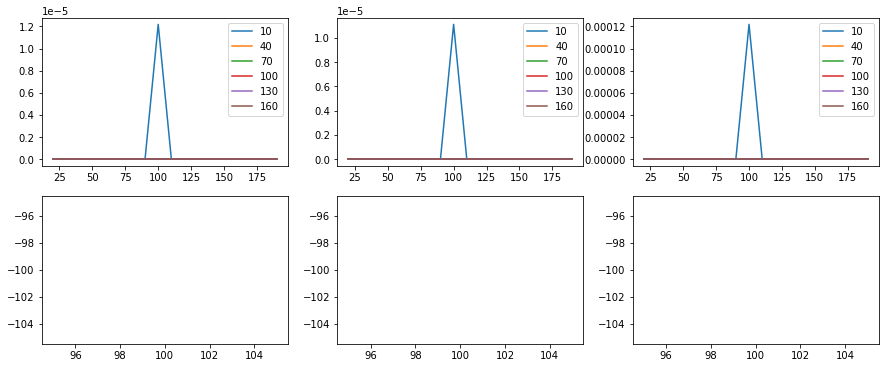

In [105]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)

# Resultados con pchange=0.1, y psurr = 0.0

In [114]:
pchange = 0.1
psurr = 0

In [115]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [116]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

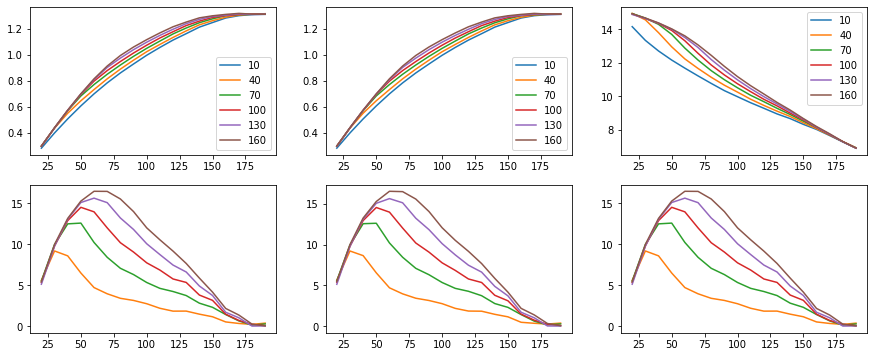

In [117]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', color='C%d'%(i+1), label = gradient)

# Resultados con pchange=0.4, y psurr = 0.0

In [109]:
pchange = 0.4
psurr = 0

In [110]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [111]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

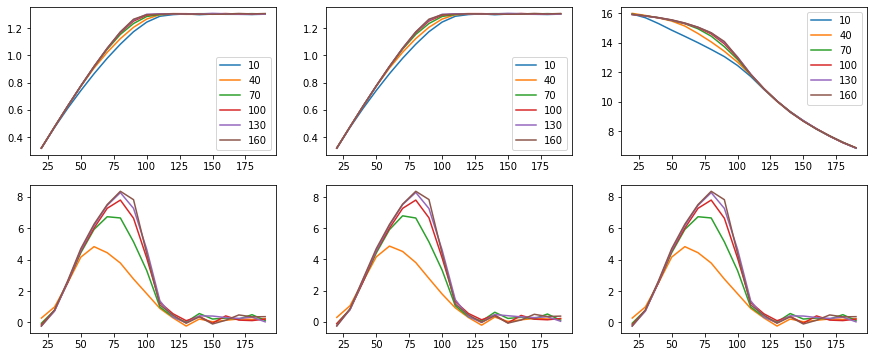

In [112]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', color='C%d'%(i+1), label = gradient)

# Resultados con Pchange = 0.7, Psurr = 0

In [93]:
pchange = 0.7
psurr = 0

In [94]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [95]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

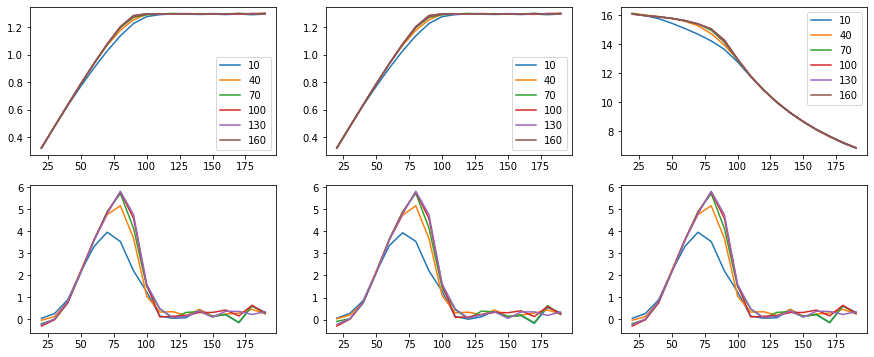

In [96]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)

# Resultados con Pchange = 1, Psurr = 0

In [97]:
pchange = 1
psurr = 0

In [98]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [99]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

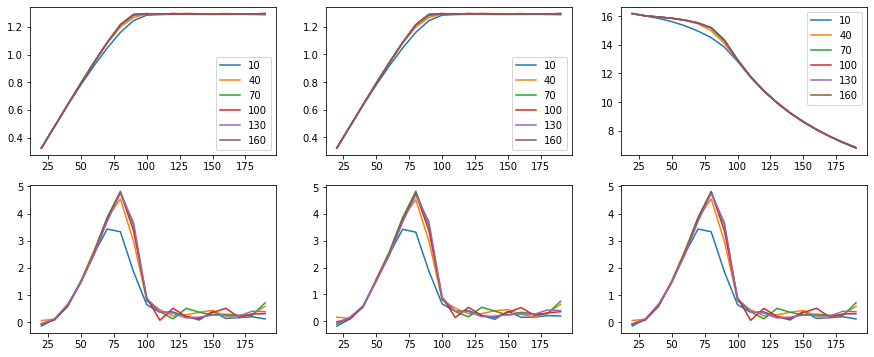

In [100]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)